In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')




### EDA

In [3]:
data = pd.read_csv('./data/calories.csv')
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
data.shape

(15000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### HEATMAP

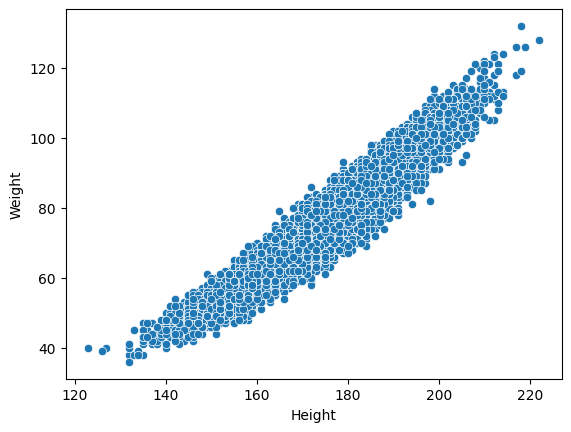

In [14]:
sb.scatterplot(x="Height", y='Weight', data=data)
plt.show()

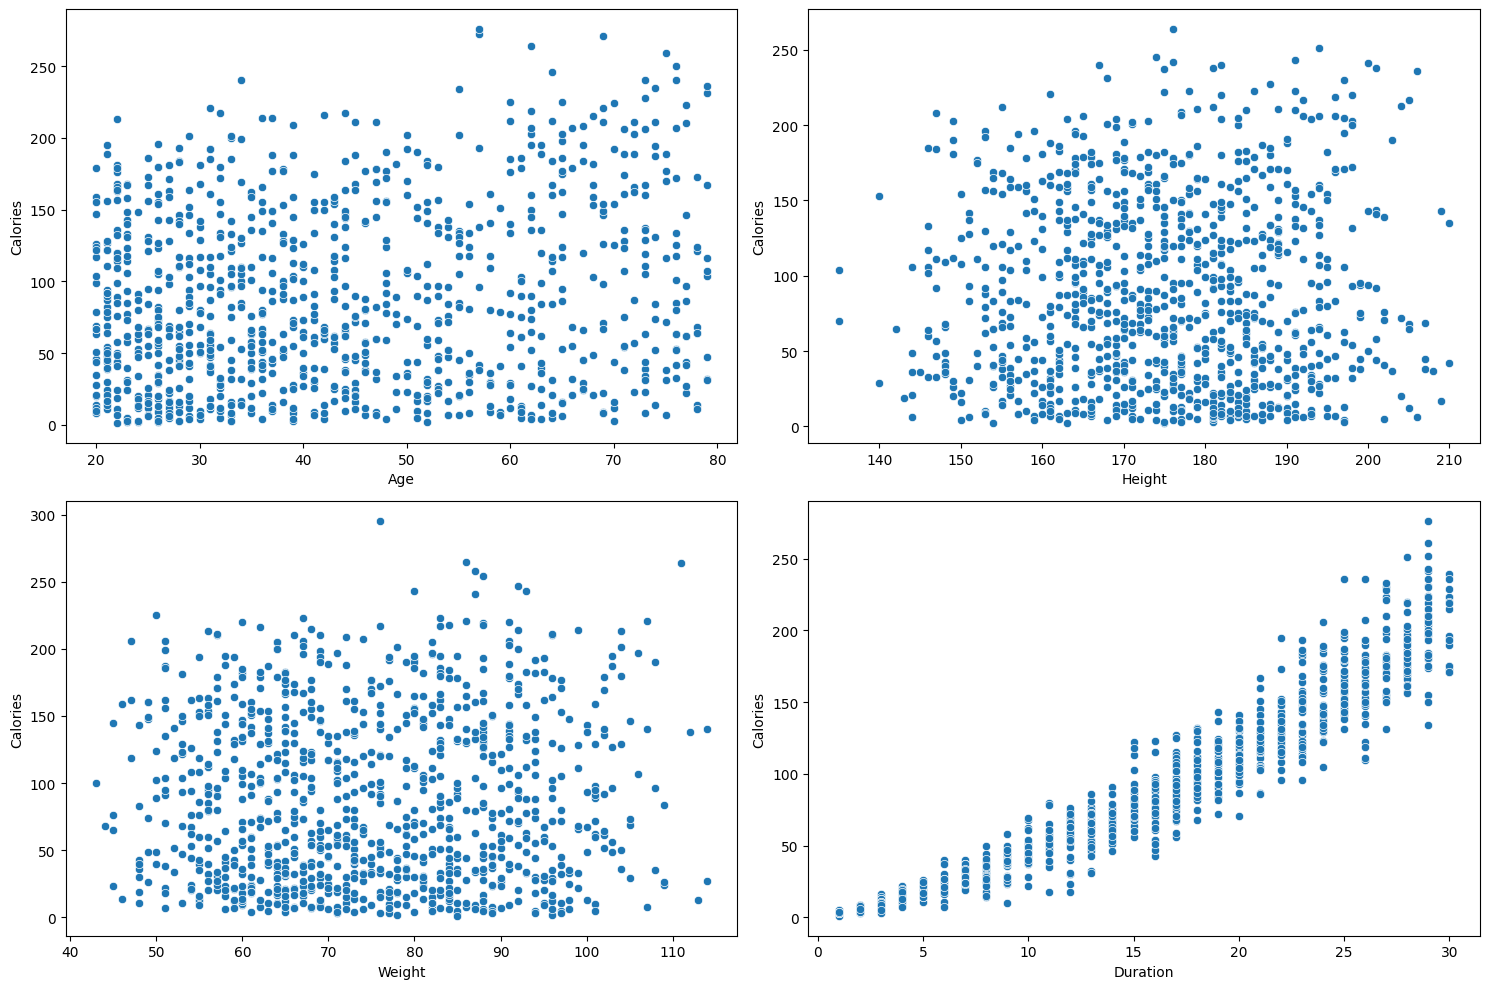

In [16]:
features = ['Age', 'Height', 'Weight', 'Duration']

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  

# Flatten the 2D axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(features):
    x = data.sample(min(1000, len(data)))  # Sample but avoid errors if data has <1000 rows
    sb.scatterplot(x=col, y='Calories', data=x, ax=axes[i])  # Use ax=axes[i] to plot on subplots

plt.tight_layout()
plt.show()


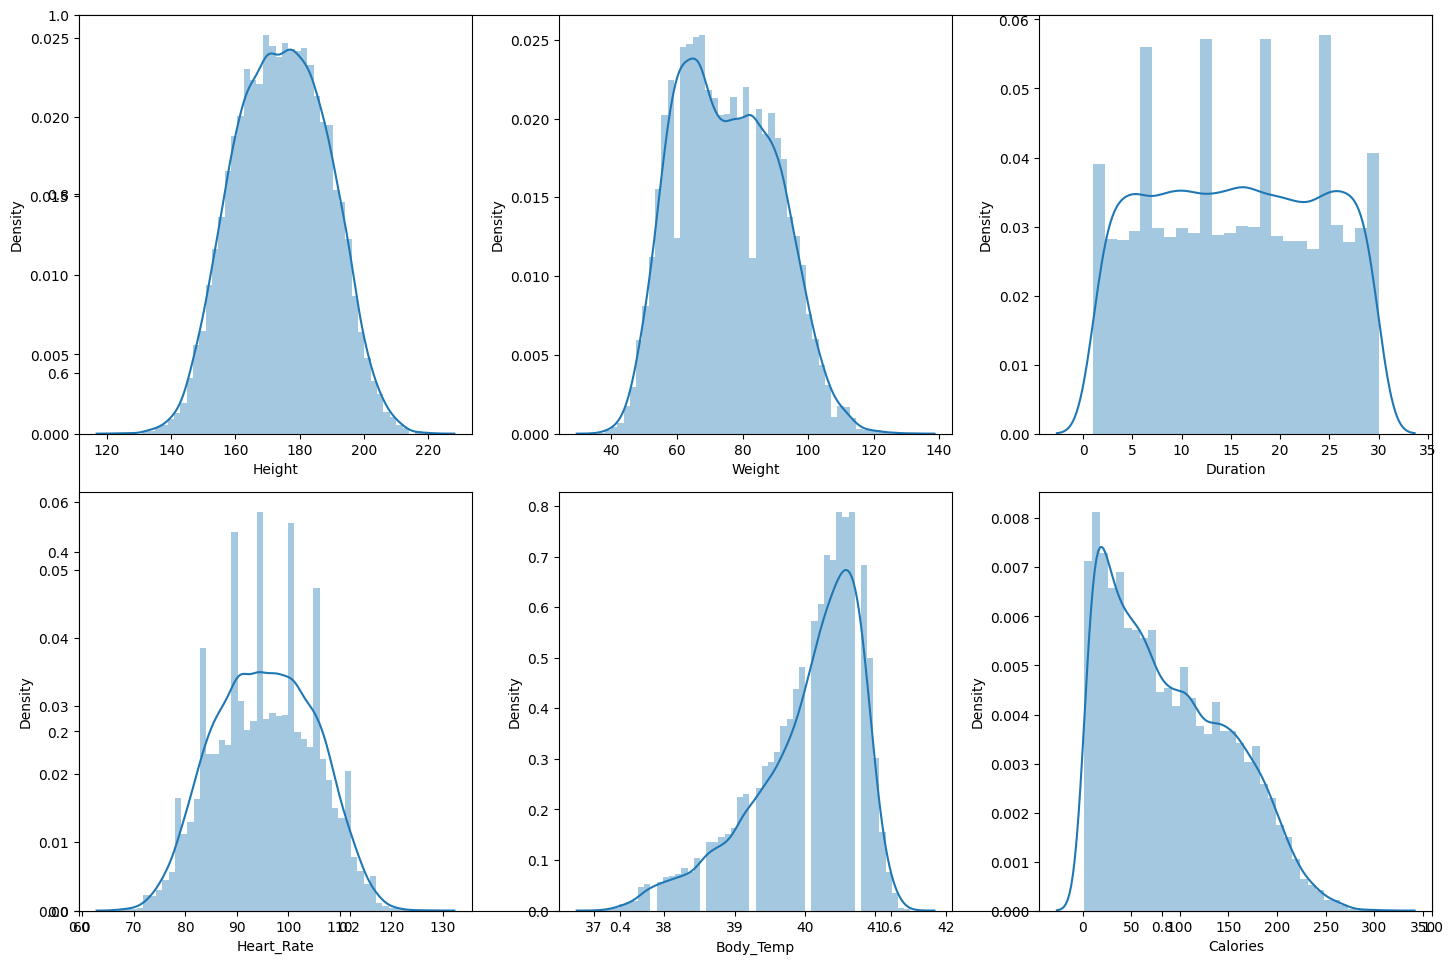

In [18]:
features = data.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(data[col])
plt.tight_layout()
plt.show()

In [19]:
data.replace({'male':0, 'female':1},
             inplace=True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


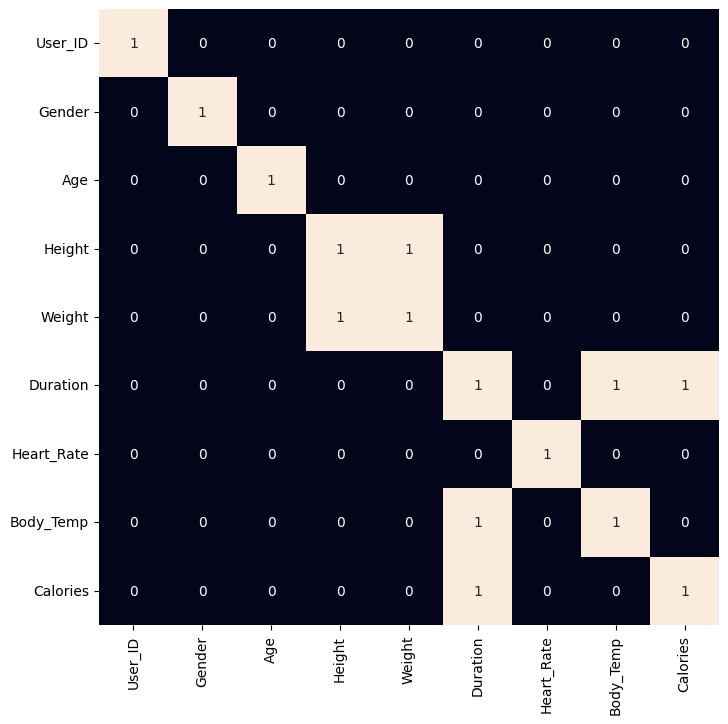

In [20]:
plt.figure(figsize=(8,8))
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [22]:
features = data.drop(['User_ID', 'Calories'], axis=1)
target = data['Calories'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)
X_train.shape, X_val.shape 

((13500, 7), (1500, 7))

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [25]:
from sklearn.metrics import mean_absolute_error as mae

models = [LinearRegression(), XGBRFRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
  models[i].fit(X_train, Y_train)
  
  print(f'{models[i]} : ')
  
  train_preds = models[i].predict(X_train)
  print('Training error : ', mae(Y_train, train_preds))
  
  val_preds = models[i].predict(X_train)
  print('Validation Error : ', mae(Y_train, val_preds))
  print()

LinearRegression() : 
Training error :  8.34589243919239
Validation Error :  8.34589243919239

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...) : 
Training error :  5.1655778220141375
Validation Error :  5.1655778220141375

Lasso() : 
Training error :  9.0403893